<a href="https://colab.research.google.com/github/CodyBurker/W266_Group_Project/blob/CodyCNNBase/CodyCNNAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
import nltk

In [2]:
!git clone https://github.com/CodyBurker/W266_Group_Project

Cloning into 'W266_Group_Project'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 47 (delta 14), reused 22 (delta 2), pack-reused 0
Unpacking objects: 100% (47/47), done.
Checking out files: 100% (9/9), done.


In [3]:
def read_in_data(path="W266_Group_Project/"):
    import pandas as pd
    X_train = pd.read_csv(path + "x_train_sampled_yelp_data.csv")
    y_train = pd.read_csv(path + "y_train_sampled_yelp_data.csv")
    X_test = pd.read_csv(path + "x_test_sampled_yelp_data.csv")
    y_test = pd.read_csv(path + "y_test_sampled_yelp_data.csv")
    return X_train, X_test, y_train, y_test

In [4]:
 X_train, X_test, y_train, y_test = read_in_data()

https://towardsdev.com/sentiment-analysis-with-cnn-using-keras-c4debff57fc5?gi=708b4ef40e2f

Encode text and pad it.

In [5]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])


In [7]:
X_train['encoded'] = tokenizer.texts_to_sequences(X_train['text'])
X_test['encoded'] = tokenizer.texts_to_sequences(X_test['text'])

(array([47936., 21142.,  6699.,  2360.,   947.,   441.,   202.,   134.,
           90.,    49.]),
 array([   0.,  101.,  202.,  303.,  404.,  505.,  606.,  707.,  808.,
         909., 1010.]),
 <a list of 10 Patch objects>)

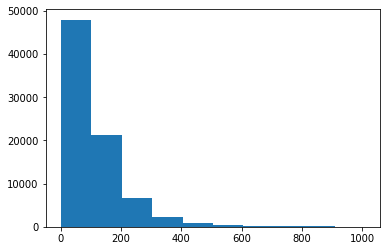

In [8]:
import matplotlib.pyplot as plt
plt.hist(X_train['encoded'].apply(len))

In [9]:
# Hyper parameters to tune later: maxlen, padding
sentence_len = 200
X_train_encoded =  pad_sequences(X_train['encoded'], maxlen=sentence_len, padding='post')
X_test_encoded = pad_sequences(X_test['encoded'], maxlen=sentence_len, padding='post')
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(80000, 200)
(20000, 200)


Create model

In [10]:
from keras import Sequential
from keras.layers import Dense, Embedding, Activation, Dropout
from keras.layers import  MaxPool1D, GlobalMaxPool1D, Conv1D
vocab_size = len(tokenizer.word_counts)

model = Sequential()
model.add(Embedding(vocab_size,300, input_length = sentence_len))
model.add(Conv1D(64,8,activation="relu"))
model.add(MaxPool1D(2))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(3,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          23360400  
                                                                 
 conv1d (Conv1D)             (None, 193, 64)           153664    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 64)           0         
 )                                                               
                                                                 
 dense (Dense)               (None, 96, 32)            2080      
                                                                 
 dropout (Dropout)           (None, 96, 32)            0         
                                                                 
 dense_1 (Dense)             (None, 96, 16)            528       
                                                        

In [11]:
# model.compile(optimizer='adam', loss='mse',metrics=['mse'])

In [12]:
# model.fit(X_train_encoded,y_train, epochs=10, validation_data = [X_test_encoded, y_test])

In [13]:
# Save model
# from google.colab import drive
# drive.mount('/content/drive')
# model.save("/content/drive/MyDrive/Code Repos/YelpCNN")
# Inspiration: https://chercher.tech/nlp/convolutional-neural-networks-cnns-for-nlp

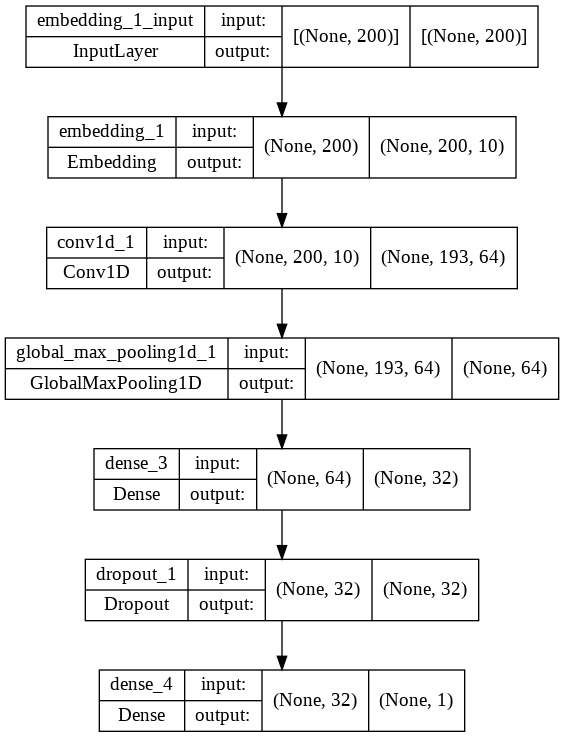

In [14]:
from keras.layers.pooling import GlobalMaxPool1D
# New model architecture
model2 = Sequential()
model2.add(Embedding(vocab_size,10, input_length = sentence_len))
model2.add(Conv1D(64,8,activation="relu"))
model2.add(GlobalMaxPool1D())
model2.add(Dense(32, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='relu'))
from keras.utils.vis_utils import plot_model
model2.compile(optimizer='adam', loss='mse',metrics=['mse'])
plot_model(model2,show_shapes=True)


In [15]:
model2.fit(X_train_encoded,y_train,
           epochs=20,
           batch_size=100, 
           validation_data = [X_test_encoded, y_test])

Epoch 1/20
800/800 [==============================] - 13s 4ms/step - loss: 2.4711 - mse: 2.4711 - val_loss: 0.7962 - val_mse: 0.7962
Epoch 2/20
800/800 [==============================] - 3s 4ms/step - loss: 1.4523 - mse: 1.4523 - val_loss: 0.6902 - val_mse: 0.6902
Epoch 3/20
800/800 [==============================] - 3s 4ms/step - loss: 1.1811 - mse: 1.1811 - val_loss: 0.6697 - val_mse: 0.6697
Epoch 4/20
800/800 [==============================] - 3s 4ms/step - loss: 0.9534 - mse: 0.9534 - val_loss: 0.6245 - val_mse: 0.6245
Epoch 5/20
800/800 [==============================] - 3s 4ms/step - loss: 0.7663 - mse: 0.7663 - val_loss: 0.6177 - val_mse: 0.6177
Epoch 6/20
800/800 [==============================] - 3s 4ms/step - loss: 0.6383 - mse: 0.6383 - val_loss: 0.6246 - val_mse: 0.6246
Epoch 7/20
800/800 [==============================] - 3s 4ms/step - loss: 0.5726 - mse: 0.5726 - val_loss: 0.6115 - val_mse: 0.6115
Epoch 8/20
800/800 [==============================] - 3s 4ms/step - loss: 0

Diangose errors. Looks like there might be some overfitting. Let's look at the 10 worst predictions:

In [16]:
predictions_raw = model2.predict(X_test_encoded)


In [17]:
un_tokenized = tokenizer.sequences_to_texts(X_test_encoded)

In [18]:
import numpy as np
predictions = pd.DataFrame({
    "text":un_tokenized,
    "true":y_test['stars'],
    "predicted":[round(x[0],1) for x in predictions_raw]
    })
predictions['error'] = np.abs(predictions['true'] - predictions['predicted'])
predictions_sorted = predictions.sort_values(by='error',ascending=False)
for i in range(len(predictions_sorted.head(10))):
  print("True rating:", predictions_sorted.iloc[i]['true'])
  print("Predicted rating:", predictions_sorted.iloc[i]['predicted'])
  print("Text:", predictions_sorted.iloc[i]['text'])
  print("")

True rating: 5.0
Predicted rating: 0.5
Text: had us scheduled for the wrong day so i received a rather bitchy phone call asking why we were late for our appointment i explained that the appointment was supposed to have been made for the next day to the receptionist but without apology and with a rather snotty attitude was told that they were completely booked the day of our anniversary and that there was nothing they could do this person was telling me that my one year wedding anniversary plans were ruined because of someone else's stupid mistake and they had the nerve to be rude about it luckily the next day i got a call from management who apologized for the mix up and for the receptionists attitude and they were able to get us in the same day we were suppose to have been scheduled free of charge due to the mistake and the absolutely horrible customer service on behalf of the receptionist who had called i was assured that they would address this this is why i will continue to be a lo

In [19]:
import plotly.express as px
predictions['text_short'] = [x[0:300] + '...' for x in predictions['text']]
fig = px.scatter(predictions, x='true',y='predicted', hover_data=['text_short'],trendline='ols',opacity=0.05)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
